<a href="https://colab.research.google.com/github/caffonso/Control/blob/main/Control7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Function


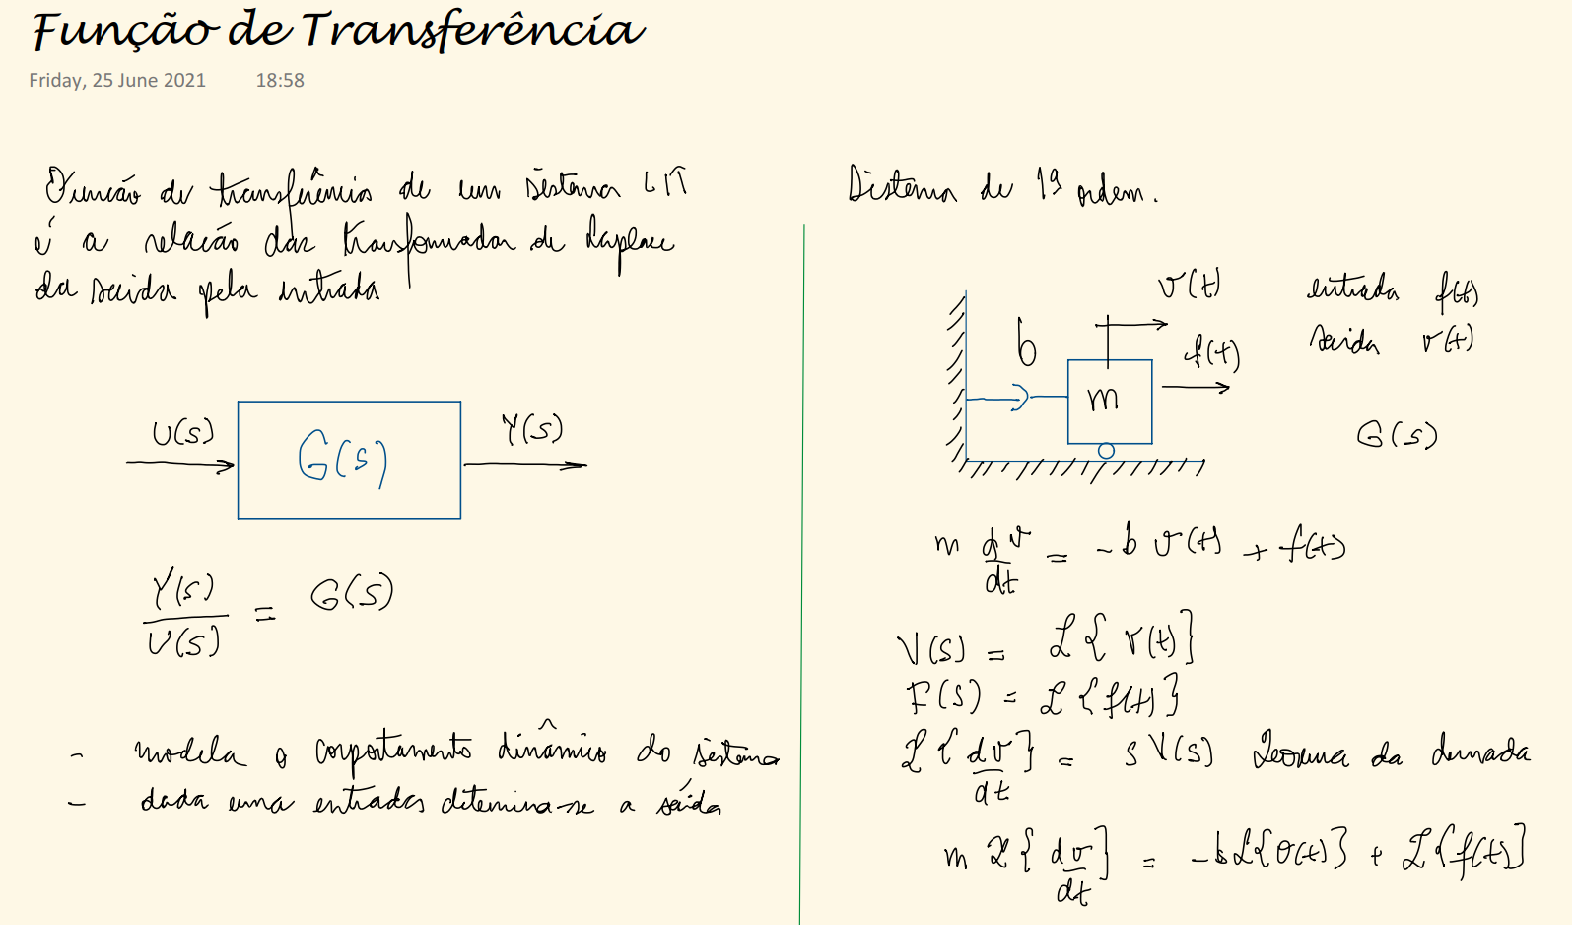

## 1. Fisrt Order System

## 1  Mechanical system

$m.\frac{\mathrm{d}}{\mathrm{d}t}v(t) = -b.v(t) + f(t)$

$\mathcal{L}(m.\frac{\mathrm{d}}{\mathrm{d}t}v(t)) = -\mathcal{L}(b.v) + \mathcal{L}(f(t))$

but

$V(s) = \mathcal{L}(v(t))$ ; $  F(s) = \mathcal{L}(f(t)) $

$\mathcal{L}(\frac{\mathrm{d}}{\mathrm{d}t} v(t))= sV(s) $

then

$F(s) = msV(s) + b.V(s) = V(s)(Ms+b)$

Transfer function

$ G(s) = \frac{\mathrm{V(s)}}{\mathrm{F(s)}} = \frac{\mathrm{1}}{\mathrm{b + m.s}} $ 

Output

$ V(s) = G(s).F(s)$

back to time:

$v(t) =  \mathcal{L}^{-1}(G(s).F(s))$

In [ ]:
import sympy
import matplotlib.pyplot as plt
import numpy
sympy.init_printing()
%matplotlib inline

In [ ]:
m, b, = sympy.symbols('m,b',real=True, positive=True)
t, s = sympy.symbols('t, s')

In [ ]:
# trnafer function
G = 1/(b+s*m)
G

In [ ]:
def L(f):
    return sympy.laplace_transform(f, t, s, noconds=True)
def invL(F):
    return sympy.inverse_laplace_transform(F, s, t)

## 2 Input

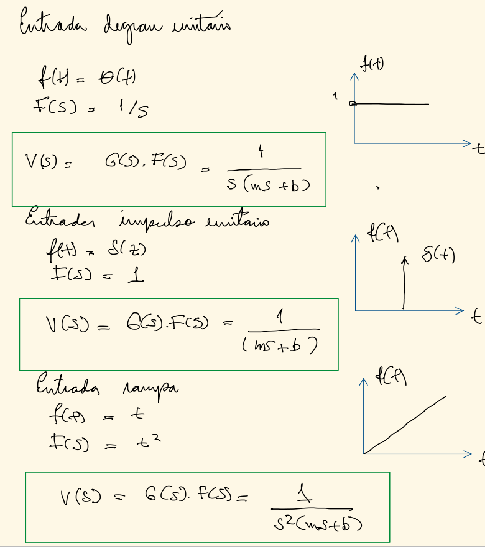

### 2.1 Imput: *Step Unit*

$ f(t) = \theta(t) $ 

$F(s) = 1/s$


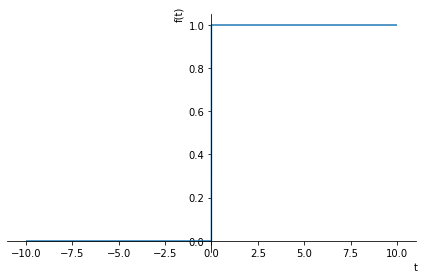

In [ ]:
# Input: 
f = sympy.Heaviside(t)
sympy.plot(f)
F = L(f)
f,F

Output:

$V(s) = G(s).F(s) = \frac{\mathrm{1}}{\mathrm{s(b + m.s)}}$

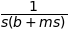

In [ ]:
F = 1/s
V = G*F
V

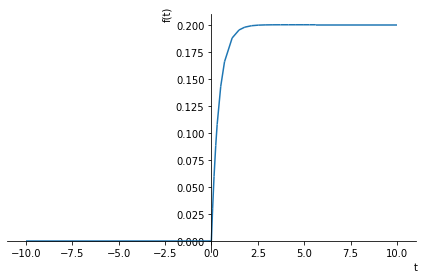

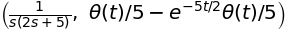

In [ ]:
m = 2
b = 5
G = 1/(b+m*s)
V = G*F
v = invL(V)
sympy.plot(v)
V,v

### 2.2 Imput: *impult unit*

$ f(t) = \delta(t) $ 

$F(s) = 1$


Output:

$V(s) = G(s).F(s) = \frac{\mathrm{1}}{\mathrm{b + m.s}}$

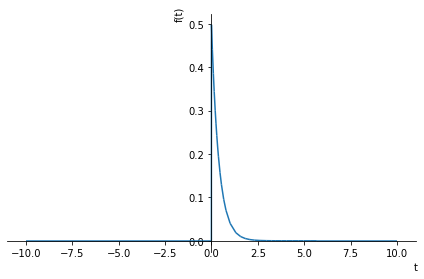

In [ ]:
m = 2
b = 5
F = 1
G = 1/(b+m*s)
V = G*F
v = invL(V)
sympy.plot(v)
V,v

### 2.3 Input: *ramp*

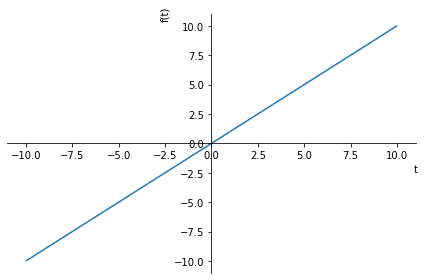

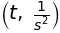

In [ ]:
f = t
F = L(f)
sympy.plot(f)
f,F

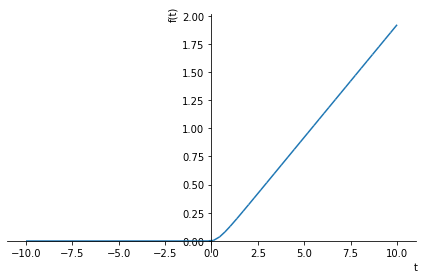

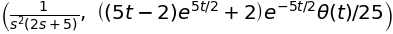

In [ ]:
m = 2
b = 5
G = 1/(b+m*s)
V = G*F
v = invL(V)
sympy.plot(v)
V,v

## 3 General Form

By convention, we usually rewrite the above in the following form, for reasons which will become apparent soon:

$ G(s) = \frac{\mathrm{K}}{\mathrm{1 + \tau.s}} $ 

In [ ]:
K, tau, = sympy.symbols('K,tau',real=True, positive=True)
G = K/(tau*s + 1)
G

The inverse laplace of a transfer function is its impulse response

In [ ]:
from ipywidgets import interact

def impulse(K,tau):
  G = K/(1+tau*s)
  v = invL(G*1)
  sympy.plot(v,xlim=(-2.5, 10), ylim=(0, 2))
  return v

def step(K,tau):
  G = K/((1+tau*s))
  v = invL(G/s)
  sympy.plot(v,xlim=(-2.5, 10), ylim=(0, 8))
  return v  
  
def ramp(K,tau):
  G = K/(1+tau*s)
  v = invL(G/s**2)
  sympy.plot(v,xlim=(-2.5, 10), ylim=(0, 8))
  return v   

In [ ]:
interact(impulse, K =(0, 10), tau =(0, 10))


interactive(children=(IntSlider(value=5, description='K', max=10), IntSlider(value=5, description='tau', max=1…

<function __main__.impulse>

In [ ]:
interact(step, K =(0, 10), tau =(0, 3))


interactive(children=(IntSlider(value=5, description='K', max=10), IntSlider(value=1, description='tau', max=3…

<function __main__.step>

In [ ]:
interact(ramp, K =(0, 10), tau =(0, 3))


interactive(children=(IntSlider(value=5, description='K', max=10), IntSlider(value=1, description='tau', max=3…

<function __main__.ramp>

Exploration of the above interaction allows us to see the following:

* $K$ scales the response in the $y$ direction
* $\tau$ scales the response in the $t$ direction
* The response of the system is always $0.63K$ when $t=\tau$

We get the "magic number" 0.63 by substituting $t=\tau$ into the response:

## Atividades

Considere o sistema mecânico a seguir, onde 

$ b = 1.2 N.s $

$ M = 1.5 Kg$

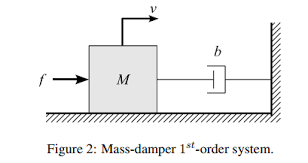

1. Determine $v(t)$ para uma força aplicada $f(t)$ com a seguinte magnitude:


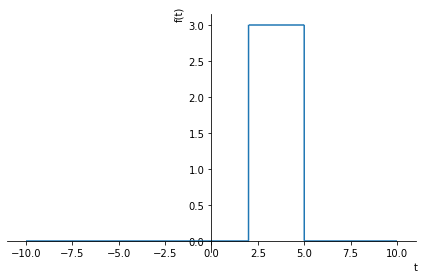

In [ ]:
f = 3*sympy.Heaviside(t-2) - 3*sympy.Heaviside(t-5)
sympy.plot(f)
plt.show()

*Equacionamento:*

$ m = 1.5 $

$ b = 1.2 $

$ F  = \mathcal{L}(f)$

$ G = \frac{\mathrm{1}}{\mathrm{b + m.s}} $ 


$ V = G.F$


$v =  \mathcal{L}^{-1}(G.F)$

*plotat v*


	Control7 - Renan

 Variáveis:
m= 1.5 
b= 1.2
Saida esperada:


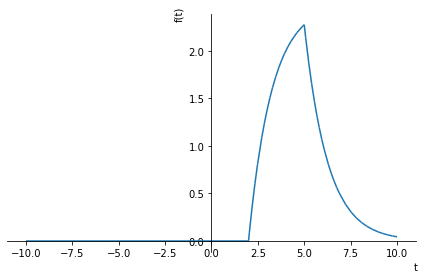

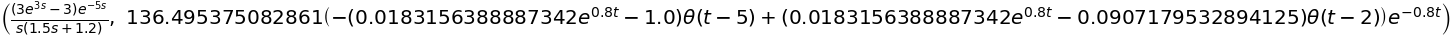

In [ ]:
## coloque seu codigo aqui
m = 1.5
b = 1.2
G = 1/(b+(m*s))
F = L(f)
V = G*F
v = invL(V)
print ('\tControl7 - Renan')
print ('\n Variáveis:\nm=',m,'\nb=',b)
print ('Saida esperada:')
#sympy.plot(v,xlim=(-2.5, 10), ylim=(0, 2))
sympy.plot(v)
V,v


*saída esperada*
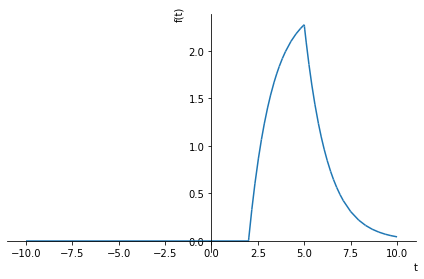

2. Encontre o deslocamento x(t) da massa M.

sendo:

$ x = \int \! v(t) \, \mathrm{d}t.$ 

*dica:*

*use a função sympy.integrate(v)*

	Dx(t)=


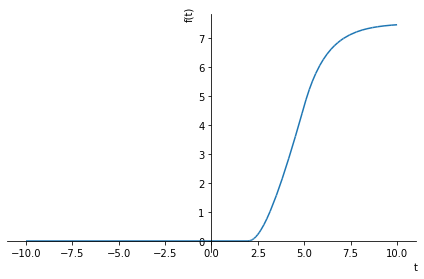

In [ ]:
# coloque seu código aqui

x = sympy.integrate(v)
print ('\tDx(t)=')
sympy.plot(x)
x

saída esperada

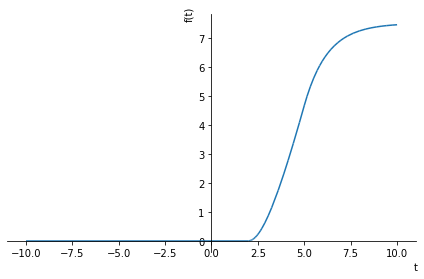